In [90]:
import pandas as pd
import os
import numpy as np

In [91]:
data = pd.read_csv(r'C:\Users\SHIVAM GHUGE\Downloads\Mechademy Assignment\DS-Intern-Assignment-Shivam-Ghuge\data\data.csv')

data

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2016-10-03 20:10:00,1139.9856929495108,20.0,22.1,38.723333333333294,19.79,39.566667,21.29,38.845000,21.390000,...,18.100000,40.09,5.816667,761.466667,68.333333,2.000000,64.666667,0.366667,10.707282,10.707282
16853,2016-10-04 06:10:00,50.0,86.00296632575207,21.29,39.6266666666667,18.1,44.290000,22.39,38.760000,NaN,...,20.200000,44.50,3.683333,752.250000,96.666667,1.000000,18.000000,3.150000,49.199695,49.199695
16854,2016-11-03 00:50:00,50.0,0.0,21.39,37.59,18.463333333333296,39.966667,21.10,37.790000,20.600000,...,18.100000,40.20,1.750000,763.000000,84.166667,1.000000,60.833333,-0.633333,6.905370,6.905370
16855,2016-11-04 13:20:00,80.0,0.0,22.5,39.36,23.6,35.730000,23.10,38.000000,22.290000,...,21.100000,39.53,16.800000,750.166667,50.333333,6.000000,40.000000,6.266667,25.020775,25.020775


In [92]:
data.sort_values(by='timestamp',inplace=True)

In [93]:
data[:20]

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.790000,NaN,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.790000,44.933333,35.921144,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.790000,45.000000,NaN,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.790000,45.000000,18.890000,...,4.476511,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.0,19.89,46.0266666666667,19.2,44.500000,19.790000,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.0,19.89,45.7666666666667,19.2,44.500000,19.790000,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.0,19.8566666666667,45.56,19.2,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,NaN,40.0,19.79,45.5975,19.2,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.0,19.8566666666667,46.09,19.23,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


In [94]:
data.dtypes

# some of the numeric columns are incorrectly classified as object datatype, we need to correct the datatype.

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [95]:
col = [col for col in data.columns if data[col].dtype == 'object']

col.remove('timestamp')

col

['equipment_energy_consumption',
 'lighting_energy',
 'zone1_temperature',
 'zone1_humidity',
 'zone2_temperature']

In [96]:
# we need to check whether these features contains some of the non numeric values and replace them with NaN.

for i in col:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [97]:
data.dtypes

timestamp                        object
equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


#### ***Handling NaN values***

In [98]:
data.isna().sum()

# every features have NaN values

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

***Splitting***

In [99]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.3,shuffle=False,random_state=101)

***filling NaN values***

In [100]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [101]:
train_imputed = imputer.fit_transform(train.drop(columns=['timestamp']))

In [102]:
test_imputed = imputer.transform(test.drop(columns=['timestamp']))

In [103]:
train_imputed = pd.DataFrame(train_imputed,columns=train.drop(columns=['timestamp']).columns)
test_imputed = pd.DataFrame(test_imputed,columns=test.drop(columns=['timestamp']).columns)

In [104]:
train = pd.concat((train[['timestamp']],train_imputed),axis=1)
test = pd.concat((test[['timestamp']].reset_index(drop=True),test_imputed),axis=1)

In [105]:
train.isna().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

In [106]:
test.isna().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

***Feature Scaling and seperating features with target***

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [109]:
train_scaled = scaler.fit_transform(train.drop(columns=['timestamp','equipment_energy_consumption']))
test_scaled = scaler.transform(test.drop(columns=['timestamp','equipment_energy_consumption']))

In [110]:
train_scaled = pd.DataFrame(train_scaled,columns=train.drop(columns=['timestamp','equipment_energy_consumption']).columns)
test_scaled = pd.DataFrame(test_scaled,columns=test.drop(columns=['timestamp','equipment_energy_consumption']).columns)

In [111]:
train_scaled = pd.concat((train[['timestamp','equipment_energy_consumption']],train_scaled),axis=1)
test_scaled = pd.concat((test[['timestamp','equipment_energy_consumption']],test_scaled),axis=1)

In [112]:
test_scaled

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-04-02 07:30:00,30.000000,-0.316011,0.036170,-0.027495,0.265447,0.154344,0.214501,-0.778473,0.146432,0.437611,0.702374,0.697448
1,2016-04-02 07:40:00,30.000000,-0.316011,0.036170,-0.027495,0.265447,0.151931,-0.767555,-0.778473,0.491816,0.445874,-0.037368,-0.042074
2,2016-04-02 07:50:00,50.000000,-0.316011,0.036170,-0.019901,0.265447,0.149518,0.226402,-0.778473,0.837199,0.454137,-0.237750,-0.242397
3,2016-04-02 08:00:00,60.000000,-0.316011,0.036170,-0.016103,0.265447,0.147105,0.232353,-0.778473,1.182583,0.462400,-0.773453,-0.777941
4,2016-04-02 08:10:00,50.000000,-0.316011,0.036170,-0.016103,0.272743,0.147105,0.214501,-0.778473,1.174907,0.456892,0.758682,0.753740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,2016-10-03 20:10:00,1139.985693,1.037410,0.556671,-0.065467,0.121950,0.405324,-0.469843,-0.554093,1.167232,-0.303306,-0.567444,-0.571993
5054,2016-10-04 06:10:00,50.000000,5.503899,0.173393,0.028083,-0.189365,-0.261944,0.541796,-0.778473,-0.981820,0.156668,0.954690,0.949689
5055,2016-11-03 00:50:00,50.000000,-0.316011,0.220711,-0.182837,-0.471495,0.516334,0.095485,-0.778473,0.990703,-0.468567,-0.717785,-0.722290
5056,2016-11-04 13:20:00,80.000000,-0.316011,0.745944,0.000466,1.724737,-0.412774,-1.112531,0.343428,0.031304,0.671730,-0.001435,-0.006152


#### *Feature handling*

***We have to take care of the two features random_variable1 and random_variable2 i.e., whether to include them or not***

*correlation with target*

In [113]:
corr_matrix = train_scaled.drop(columns=['timestamp']).corr()

print(corr_matrix['equipment_energy_consumption'][['random_variable1','random_variable2']])

random_variable1   -0.006983
random_variable2   -0.004694
Name: equipment_energy_consumption, dtype: float64


*the correlation is negative but weak, suggesting there is little influence on the target*

----------------------------------

***mutual information (MI)***

*Mutual information (MI) is a technique used to measure the statistical dependence between random variables.*
*MI is a non-negative value, with higher values indicating stronger dependence and zero indicating independence.*

In [114]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(train_scaled[['random_variable1','random_variable2']],train_scaled['equipment_energy_consumption'])

print(f"Mutual Information Scores:\nrandom_variable1: {mi_scores[0]}, random_variable2: {mi_scores[1]}")


Mutual Information Scores:
random_variable1: 0.014417452382891938, random_variable2: 0.015467002453399381


*A low MI (Mutual Information) score represents that the feature has little or no dependency with the target variable, even in a non-linear way.*

--------------------------

***Multicollinearity (VIF Analysis)***

**VIF Range**

VIF = 1 : No correlation between the predictor and other predictors in the model.

1 < VIF < 5 : Acceptable, moderate correlation.

VIF ≥ 5 : Warning signal, significant multicollinearity.

VIF ≥ 10 : Critical threshold, severe multicollinearity.

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

required_data = train_scaled.drop(columns=['timestamp','equipment_energy_consumption'])

vif_data = pd.DataFrame()
vif_data['features'] = list(required_data.columns)

vif_data['vif'] = [variance_inflation_factor(required_data.values,i) for i in range(len(required_data.columns))]

In [116]:
vif_data[-2:]

,features,vif
9,random_variable1,1.105216
10,random_variable2,1.104989


*the vif values here indicating that these two features are not correlated with other variables, which is good*

*The MI score and correlation with target is showing red flag but vif is indicating good sign. The last approach is to train model with and without considering these two features*

#### ***Feature Engineering***

***we have timestamp feature which we can break it into month,week,day,hours and minutes to create temporal features which we can utilize. This is important becuase energy consumption is based on time.***

In [117]:
# converting to datetime datatype

train_scaled['timestamp'] = pd.to_datetime(train_scaled['timestamp'])

test_scaled['timestamp'] = pd.to_datetime(test_scaled['timestamp'])

In [118]:
train_scaled['hour'] = train_scaled['timestamp'].dt.hour
train_scaled['minute'] = train_scaled['timestamp'].dt.minute
train_scaled['month'] = train_scaled['timestamp'].dt.month
train_scaled['day_of_week'] = train_scaled['timestamp'].dt.dayofweek

In [119]:
test_scaled['hour'] = test_scaled['timestamp'].dt.hour
test_scaled['minute'] = test_scaled['timestamp'].dt.minute
test_scaled['month'] = test_scaled['timestamp'].dt.month
test_scaled['day_of_week'] = test_scaled['timestamp'].dt.dayofweek

***we have encode these features otherwise model just assume them as numerical features making no use of creating them***

*hour, minute, month are cyclical as they repeat again. Hence, we are doing sin,cos cyclical encoding*

In [120]:
train_scaled['hour_sin'] = np.sin(2 * np.pi * train_scaled['hour'] / 24)
train_scaled['hour_cos'] = np.cos(2 * np.pi * train_scaled['hour'] / 24)

# Minute of the hour (0 to 59)
train_scaled['minute_sin'] = np.sin(2 * np.pi * train_scaled['minute'] / 60)
train_scaled['minute_cos'] = np.cos(2 * np.pi * train_scaled['minute'] / 60)

# Day of the week (0 to 6)
train_scaled['day_of_week_sin'] = np.sin(2 * np.pi * train_scaled['day_of_week'] / 7)
train_scaled['day_of_week_cos'] = np.cos(2 * np.pi * train_scaled['day_of_week'] / 7)

# Month of the year (1 to 12)
train_scaled['month_sin'] = np.sin(2 * np.pi * (train_scaled['month'] - 1) / 12)
train_scaled['month_cos'] = np.cos(2 * np.pi * (train_scaled['month'] - 1) / 12)


train_scaled.drop(columns=['timestamp','hour','minute','day_of_week','month'],inplace=True)

In [121]:
test_scaled['hour_sin'] = np.sin(2 * np.pi * test_scaled['hour'] / 24)
test_scaled['hour_cos'] = np.cos(2 * np.pi * test_scaled['hour'] / 24)

# Minute of the hour (0 to 59)
test_scaled['minute_sin'] = np.sin(2 * np.pi * test_scaled['minute'] / 60)
test_scaled['minute_cos'] = np.cos(2 * np.pi * test_scaled['minute'] / 60)

# Day of the week (0 to 6)
test_scaled['day_of_week_sin'] = np.sin(2 * np.pi * test_scaled['day_of_week'] / 7)
test_scaled['day_of_week_cos'] = np.cos(2 * np.pi * test_scaled['day_of_week'] / 7)

# Month of the year (1 to 12)
test_scaled['month_sin'] = np.sin(2 * np.pi * (test_scaled['month'] - 1) / 12)
test_scaled['month_cos'] = np.cos(2 * np.pi * (test_scaled['month'] - 1) / 12)


test_scaled.drop(columns=['timestamp','hour','minute','day_of_week','month'],inplace=True)

In [122]:
test_scaled.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,30.0,-0.316011,0.03617,-0.027495,0.265447,0.154344,0.214501,-0.778473,0.146432,0.437611,0.702374,0.697448,0.965926,-0.258819,5.665539e-16,-1.0,-0.974928,-0.222521,1.0,6.123234e-17
1,30.0,-0.316011,0.03617,-0.027495,0.265447,0.151931,-0.767555,-0.778473,0.491816,0.445874,-0.037368,-0.042074,0.965926,-0.258819,-8.660254e-01,-0.5,-0.974928,-0.222521,1.0,6.123234e-17
2,50.0,-0.316011,0.03617,-0.019901,0.265447,0.149518,0.226402,-0.778473,0.837199,0.454137,-0.237750,-0.242397,0.965926,-0.258819,-8.660254e-01,0.5,-0.974928,-0.222521,1.0,6.123234e-17
3,60.0,-0.316011,0.03617,-0.016103,0.265447,0.147105,0.232353,-0.778473,1.182583,0.462400,-0.773453,-0.777941,0.866025,-0.500000,0.000000e+00,1.0,-0.974928,-0.222521,1.0,6.123234e-17
4,50.0,-0.316011,0.03617,-0.016103,0.272743,0.147105,0.214501,-0.778473,1.174907,0.456892,0.758682,0.753740,0.866025,-0.500000,8.660254e-01,0.5,-0.974928,-0.222521,1.0,6.123234e-17


#### ***Anomaly Detection***

In [123]:
from scipy.stats import zscore

In [124]:
def detect_and_remove_outliers(data, method='isolation_forest'):
    """
    Detects and removes outliers from the DataFrame.
    
    Parameters:
    - data (pd.DataFrame): Input DataFrame.
    - method (str): Method for anomaly detection. Options are:
        - 'zscore'
        - 'iqr'

    Returns:
    - pd.DataFrame: Cleaned DataFrame with outliers removed.
    """
    data_clean = data.copy()

    if method == 'zscore':
        # Z-Score method
        z_scores = np.abs(zscore(data_clean.select_dtypes(include=[np.number])))
        data_clean = data_clean[(z_scores < 3).all(axis=1)]

    elif method == 'iqr':
        # IQR method
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        data_clean = data_clean[~((data_clean < (Q1 - 1.5 * IQR)) | (data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    # Reset index to maintain alignment
    data_clean.reset_index(drop=True, inplace=True)
    
    print(f"Outliers removed. Original rows: {len(data)}, Cleaned rows: {len(data_clean)}")
    return data_clean


In [ ]:
clean_train_data = detect_and_remove_outliers(train_scaled,method='iqr')

#### ***Feature Importance***

*Before training the model when have to check which features are giving importance to predict the target*

In [126]:
X_train = clean_train_data.drop(columns=['equipment_energy_consumption'])
X_test = test_scaled.drop(columns=['equipment_energy_consumption'])

y_train = clean_train_data['equipment_energy_consumption']
y_test = test_scaled['equipment_energy_consumption']

In [127]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=250,
    max_depth = 6,
    grow_policy = 'lossguide',
    booster='gbtree'
)

In [ ]:
help(XGBRegressor)

In [128]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy='lossguide',
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
feature_importance = pd.DataFrame()

feature_importance['features'] = list(X_train.columns)

feature_importance['importance_score'] = xgb.feature_importances_

feature_importance.sort_values(by='importance_score',ascending=False,inplace=True)

feature_importance

In [130]:
X_train.drop(columns=['month_cos'],inplace=True)
X_test.drop(columns=['month_cos'],inplace=True)

## ***Model Training***

#### *Without random_variable1 and random_variable2*

In [131]:
X_train_ = X_train.drop(columns=['random_variable1','random_variable2'])
X_test_ = X_test.drop(columns=['random_variable1','random_variable2'])

***LGBM***

In [65]:
from lightgbm import LGBMRegressor

In [132]:
lgbm_regressor = LGBMRegressor(
    boosting_type='rf',
    max_depth=8,
    num_leaves=15,
    learning_rate=0.01,
    n_estimators=300,
    reg_alpha=1,
    reg_lambda=1,
    importance_type='gain',
    bagging_fraction=0.6,  
    feature_fraction=0.7,
)


In [ ]:
help(LGBMRegressor)

In [79]:
lgbm_regressor.fit(X_train_,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5925
[LightGBM] [Info] Number of data points in the train set: 4350, number of used features: 32
[LightGBM] [Info] Start training from score 63.218890


LGBMRegressor(bagging_fraction=0.6, boosting_type='rf', feature_fraction=0.7,
              importance_type='gain', learning_rate=0.01, max_depth=8,
              n_estimators=300, num_leaves=15, reg_alpha=1, reg_lambda=1)

In [133]:
# p
lgbm_regressor.fit(X_train_,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 7364, number of used features: 16
[LightGBM] [Info] Start training from score 63.944347


LGBMRegressor(bagging_fraction=0.6, boosting_type='rf', feature_fraction=0.7,
              importance_type='gain', learning_rate=0.01, max_depth=8,
              n_estimators=300, num_leaves=15, reg_alpha=1, reg_lambda=1)

In [80]:
lgbm_regressor.score(X_train_,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


0.48858698912252485

In [81]:
y_pred = lgbm_regressor.predict(X_test_)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [70]:
residual_df = pd.DataFrame()

residual_df['y_true'] = y_test
residual_df['y_pred'] = y_pred

residual_df['error'] = residual_df['y_true'] - residual_df['y_pred']

residual_df

,y_true,y_pred,error
0,30.000000,55.791832,-25.791832
1,30.000000,53.764660,-23.764660
2,50.000000,55.791832,-5.791832
3,60.000000,70.562043,-10.562043
4,50.000000,69.083628,-19.083628
...,...,...,...
5053,1139.985693,101.383973,1038.601720
5054,50.000000,56.890083,-6.890083
5055,50.000000,49.212407,0.787593
5056,80.000000,79.496618,0.503382


In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

rmse = math.sqrt(mean_squared_error(y_test,y_pred))

mae = mean_absolute_error(y_test,y_pred)

In [72]:
rmse

176.86447403165545

In [73]:
mae

62.91836567212875

#### *With random_variable1 and random_variable2*

In [228]:
lgbm_regressor_n = LGBMRegressor(
    boosting_type='rf',
    max_depth=8,
    num_leaves=15,
    learning_rate=0.01,
    n_estimators=300,
    reg_alpha=1,
    reg_lambda=1,
    importance_type='gain',
    bagging_fraction=0.6,  
    feature_fraction=0.7
)

In [229]:
lgbm_regressor_n.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6435
[LightGBM] [Info] Number of data points in the train set: 4350, number of used features: 34
[LightGBM] [Info] Start training from score 63.218890


LGBMRegressor(bagging_fraction=0.6, boosting_type='rf', feature_fraction=0.7,
              importance_type='gain', learning_rate=0.01, max_depth=8,
              n_estimators=300, num_leaves=15, reg_alpha=1, reg_lambda=1)

In [230]:
lgbm_regressor_n.score(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


0.48526198595011194

In [232]:
y_pred_ = lgbm_regressor_n.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [233]:
rmse_ = np.sqrt(mean_squared_error(y_test,y_pred_))

mae_ = mean_absolute_error(y_test,y_pred_)

In [234]:
rmse_

176.9507764213138

In [235]:
mae_

63.01948414649719

## ***Conclusion***

*removing random_variable1 and random_variable2 features or not removing does not change the metrics meaning they don't have any influence*

*Most of the features do not providing that much influence that we can clearly see in ***feature_importance*** table*

*Even R2 score is bad rmse and mae is quite good, except some large errors other residuals are very less showing model generalizes the data well*

#### ***Features Influencing Energy Consumption***

In [62]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(lgbm_regressor,X_test_, y_test, scoring='r2')

sorted_idx = np.argsort(result.importances_mean)

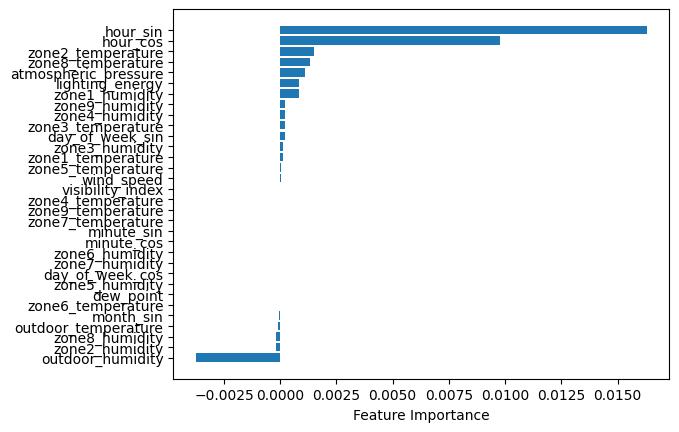

In [83]:
plt.barh(X_test_.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()